1. Desarrollar un algoritmo que imprima de manera ascendente los valores (todos del mismo tipo) de un diccionario.


In [1]:
def print_asc(diccionario):
    """
    Función que recibe un diccionario e imprime sus valores de manera ascendente.

    Args:
        diccionario (dict): Diccionario a organizar.

    """
    valores_ordenados = dict(sorted(diccionario.items(), key=lambda x: x[1]))
    print(valores_ordenados)

def main():
    """
    Función principal del programa.
    """
    diccionario = {'Colombia': 52, 'Brazil': 216, 'Argentina': 47, 'Mexico': 128}
    print_asc(diccionario)

if __name__ == "__main__":
    main()

{'Argentina': 47, 'Colombia': 52, 'Mexico': 128, 'Brazil': 216}


2. Desarrollar una función que reciba dos diccionarios como parámetros y los mezcle, es decir, que se construya un nuevo diccionario con las llaves de los dos diccionarios; si hay una clave repetida en ambos diccionarios, se debe asignar el valor que tenga la clave en el primer diccionario.


In [2]:
def mezclar_dict(diccionario1, diccionario2):
    """
    Función que recibe dos diccionarios y los mezcla.

    Args:
        diccionario1 (dict): Primer diccionario.
        diccionario2 (dict): Segundo diccionario.

    Returns:
        dict: Diccionario mezclado.

    """
    diccionario_mezclado = diccionario1.copy()
    diccionario_mezclado.update(diccionario2)
    return diccionario_mezclado

def main():
    """
    Función principal del programa.
    """
    ciudades_pob1 = {
        "Bogotá": 10190000,
        "Medellín": 2750000,
        "Cali": 2550000,
        "Barranquilla": 1950000,
        "Villavicencio": 410000
    }

    ciudades_pob2 = {
        "Cartagena": 950000,
        "Cúcuta": 750000,
        "Cali": 2540000,
        "Soledad": 660000,
        "Bucaramanga": 530000,
        "Medellín": 2750001
    }

    diccionario_mezclado = mezclar_dict(ciudades_pob1, ciudades_pob2)
    print(diccionario_mezclado)

if __name__ == "__main__":
    main()

{'Bogotá': 10190000, 'Medellín': 2750001, 'Cali': 2540000, 'Barranquilla': 1950000, 'Villavicencio': 410000, 'Cartagena': 950000, 'Cúcuta': 750000, 'Soledad': 660000, 'Bucaramanga': 530000}


3. Dado el JSON:
```JSON
{
	"jadiazcoronado":{
		"nombres": "Juan Antonio",
		"apellidos": "Díaz Coronado",
		"edad":19,
		"colombiano":true,
		"deportes":["Fútbol","Ajedrez","Gimnasia"]
	},
	"dmlunasol":{
		"nombres": "Dorotea Maritza",
		"apellidos": "Luna Sol",
		"edad":25,
		"colombiano":false,
		"deportes":["Baloncesto","Ajedrez","Gimnasia"]
	}
}
```
 Cree un programa que lea de un archivo con dicho JSON y:
 - Imprima los nombres completos (nombre y apellidos) de las personas que practican el deporte ingresado por el usuario.
 - Imprima los nombres completos (nombre y apellidos) de las personas que estén en un rango de edades dado por el usuario.

In [3]:
import json

def cargar_datos():
    # Datos de ejemplo - en una aplicación real se leería desde un archivo
    datos_json = '''{
        "jadiazcoronado": {
            "nombres": "Juan Antonio",
            "apellidos": "Díaz Coronado",
            "edad": 19,
            "colombiano": true,
            "deportes": ["Fútbol", "Ajedrez", "Gimnasia"]
        },
        "dmlunasol": {
            "nombres": "Dorotea Maritza",
            "apellidos": "Luna Sol",
            "edad": 25,
            "colombiano": false,
            "deportes": ["Baloncesto", "Ajedrez", "Gimnasia"]
        }
    }'''

    try:
        return json.loads(datos_json)
    except json.JSONDecodeError as e:
        print(f"Error al procesar el JSON: {e}")
        return None

def buscar_por_deporte(datos, deporte):
    """Busca personas que practiquen un deporte específico."""
    resultados = []
    for id_persona, persona in datos.items():
        if deporte in persona["deportes"]:
            nombre_completo = f"{persona['nombres']} {persona['apellidos']}"
            resultados.append(nombre_completo)
    return resultados

def buscar_por_edad(datos, edad_min, edad_max):
    """Busca personas dentro de un rango de edad."""
    resultados = []
    for id_persona, persona in datos.items():
        if edad_min <= persona["edad"] <= edad_max:
            nombre_completo = f"{persona['nombres']} {persona['apellidos']}"
            resultados.append(nombre_completo)
    return resultados

def main():
    """
    Función principal del programa.
    """

    datos = cargar_datos()

    # Buscar personas por deporte
    deporte_busqueda = "Ajedrez"
    resultados_deporte = buscar_por_deporte(datos, deporte_busqueda)
    print(f"\nPersonas que practican {deporte_busqueda}:")
    for nombre in resultados_deporte:
        print(f"- {nombre}")

    edad_min = int(input("Ingrese la edad mínima: "))
    edad_max = int(input("Ingrese la edad máxima: "))
    resultados_edad = buscar_por_edad(datos, edad_min, edad_max)
    print(f"\nPersonas con edades entre {edad_min} y {edad_max}:")
    for nombre in resultados_edad:
        print(f"- {nombre}")

if __name__ == "__main__":
    main()


Personas que practican Ajedrez:
- Juan Antonio Díaz Coronado
- Dorotea Maritza Luna Sol
Ingrese la edad mínima: 5
Ingrese la edad máxima: 20

Personas con edades entre 5 y 20:
- Juan Antonio Díaz Coronado


4. El siguiente código contiene un JSON con el pronostivo detallado del clima para 8 días:

```python
import json

# Cargar archivo
jsonString = '''
{\"dt\": {\"0\": 1685116800, \"1\": 1685203200, \"2\": 1685289600, \"3\": 1685376000, \"4\": 1685462400, \"5\": 1685548800, \"6\": 1685635200, \"7\": 1685721600}, \"sunrise\": {\"0\": 1685097348, \"1\": 1685183745, \"2\": 1685270143, \"3\": 1685356542, \"4\": 1685442942, \"5\": 1685529342, \"6\": 1685615743, \"7\": 1685702145}, \"sunset\": {\"0\": 1685143042, \"1\": 1685229458, \"2\": 1685315875, \"3\": 1685402291, \"4\": 1685488708, \"5\": 1685575124, \"6\": 1685661541, \"7\": 1685747958}, \"moonrise\": {\"0\": 1685118300, \"1\": 1685207460, \"2\": 1685296620, \"3\": 1685385720, \"4\": 1685474880, \"5\": 1685564220, \"6\": 1685653740, \"7\": 1685743500}, \"moonset\": {\"0\": 0, \"1\": 1685164320, \"2\": 1685253000, \"3\": 1685341560, \"4\": 1685430120, \"5\": 1685518740, \"6\": 1685607600, \"7\": 1685696640}, \"moon_phase\": {\"0\": 0.22, \"1\": 0.25, \"2\": 0.28, \"3\": 0.31, \"4\": 0.35, \"5\": 0.38, \"6\": 0.41, \"7\": 0.45}, \"pressure\": {\"0\": 1011, \"1\": 1012, \"2\": 1012, \"3\": 1012, \"4\": 1012, \"5\": 1012, \"6\": 1012, \"7\": 1011}, \"humidity\": {\"0\": 85, \"1\": 61, \"2\": 68, \"3\": 74, \"4\": 84, \"5\": 66, \"6\": 81, \"7\": 82}, \"dew_point\": {\"0\": 23.93, \"1\": 22.5, \"2\": 23.67, \"3\": 23.35, \"4\": 24.22, \"5\": 22.73, \"6\": 23.18, \"7\": 22.93}, \"velViento\": {\"0\": 3.56, \"1\": 5.07, \"2\": 5.38, \"3\": 3.95, \"4\": 4.74, \"5\": 3.75, \"6\": 4.08, \"7\": 5.94}, \"dirViento\": {\"0\": 188, \"1\": 14, \"2\": 21, \"3\": 23, \"4\": 40, \"5\": 330, \"6\": 176, \"7\": 168}, \"wind_gust\": {\"0\": 6.47, \"1\": 8.86, \"2\": 8.95, \"3\": 6.12, \"4\": 7.17, \"5\": 5.4, \"6\": 5.13, \"7\": 9.67}, \"weather\": {\"0\": [{\"id\": 501, \"main\": \"Rain\", \"description\": \"lluvia moderada\", \"icon\": \"10d\"}], \"1\": [{\"id\": 500, \"main\": \"Rain\", \"description\": \"lluvia ligera\", \"icon\": \"10d\"}], \"2\": [{\"id\": 501, \"main\": \"Rain\", \"description\": \"lluvia moderada\", \"icon\": \"10d\"}], \"3\": [{\"id\": 500, \"main\": \"Rain\", \"description\": \"lluvia ligera\", \"icon\": \"10d\"}], \"4\": [{\"id\": 501, \"main\": \"Rain\", \"description\": \"lluvia moderada\", \"icon\": \"10d\"}], \"5\": [{\"id\": 500, \"main\": \"Rain\", \"description\": \"lluvia ligera\", \"icon\": \"10d\"}], \"6\": [{\"id\": 500, \"main\": \"Rain\", \"description\": \"lluvia ligera\", \"icon\": \"10d\"}], \"7\": [{\"id\": 500, \"main\": \"Rain\", \"description\": \"lluvia ligera\", \"icon\": \"10d\"}]}, \"clouds\": {\"0\": 100, \"1\": 82, \"2\": 99, \"3\": 100, \"4\": 100, \"5\": 59, \"6\": 100, \"7\": 100}, \"pop\": {\"0\": 1.0, \"1\": 0.65, \"2\": 0.98, \"3\": 0.86, \"4\": 1.0, \"5\": 0.62, \"6\": 0.93, \"7\": 0.95}, \"prcp\": {\"0\": 40.0, \"1\": 1.65, \"2\": 14.01, \"3\": 5.07, \"4\": 16.55, \"5\": 2.17, \"6\": 2.77, \"7\": 1.73}, \"uvi\": {\"0\": 10.14, \"1\": 12.78, \"2\": 12.73, \"3\": 8.44, \"4\": 0.59, \"5\": 1.0, \"6\": 1.0, \"7\": 1.0}, \"temp.day\": {\"0\": 26.62, \"1\": 30.95, \"2\": 30.17, \"3\": 28.37, \"4\": 27.22, \"5\": 29.78, \"6\": 26.83, \"7\": 26.36}, \"tmpMin\": {\"0\": 25.64, \"1\": 24.64, \"2\": 25.84, \"3\": 25.56, \"4\": 25.72, \"5\": 24.86, \"6\": 25.96, \"7\": 25.47}, \"tmpMax\": {\"0\": 27.16, \"1\": 31.1, \"2\": 30.2, \"3\": 29.5, \"4\": 28.87, \"5\": 29.78, \"6\": 28.96, \"7\": 28.25}, \"temp.night\": {\"0\": 25.67, \"1\": 27.39, \"2\": 26.24, \"3\": 27.2, \"4\": 25.92, \"5\": 27.14, \"6\": 26.56, \"7\": 25.66}, \"temp.eve\": {\"0\": 25.91, \"1\": 28.73, \"2\": 27.42, \"3\": 28.27, \"4\": 27.94, \"5\": 29.29, \"6\": 28.96, \"7\": 28.12}, \"temp.morn\": {\"0\": 26.5, \"1\": 24.64, \"2\": 26.13, \"3\": 25.72, \"4\": 26.04, \"5\": 24.86, \"6\": 25.98, \"7\": 25.57}, \"feels_like.day\": {\"0\": 26.62, \"1\": 34.99, \"2\": 34.96, \"3\": 32.03, \"4\": 30.67, \"5\": 33.62, \"6\": 29.45, \"7\": 26.36}, \"feels_like.night\": {\"0\": 26.56, \"1\": 30.98, \"2\": 26.24, \"3\": 30.62, \"4\": 26.84, \"5\": 30.16, \"6\": 26.56, \"7\": 26.45}, \"feels_like.eve\": {\"0\": 26.85, \"1\": 32.49, \"2\": 30.94, \"3\": 31.8, \"4\": 31.51, \"5\": 33.17, \"6\": 32.64, \"7\": 31.18}, \"feels_like.morn\": {\"0\": 26.5, \"1\": 25.48, \"2\": 26.13, \"3\": 26.62, \"4\": 26.04, \"5\": 25.73, \"6\": 25.98, \"7\": 26.4}, \"date\": {\"0\": 1685098800000, \"1\": 1685185200000, \"2\": 1685271600000, \"3\": 1685358000000, \"4\": 1685444400000, \"5\": 1685530800000, \"6\": 1685617200000, \"7\": 1685703600000}, \"main\": {\"0\": \"Rain\", \"1\": \"Rain\", \"2\": \"Rain\", \"3\": \"Rain\", \"4\": \"Rain\", \"5\": \"Rain\", \"6\": \"Rain\", \"7\": \"Rain\"}, \"description\": {\"0\": \"lluvia moderada\", \"1\": \"lluvia ligera\", \"2\": \"lluvia moderada\", \"3\": \"lluvia ligera\", \"4\": \"lluvia moderada\", \"5\": \"lluvia ligera\", \"6\": \"lluvia ligera\", \"7\": \"lluvia ligera\"}, \"icono\": {\"0\": \"10d\", \"1\": \"10d\", \"2\": \"10d\", \"3\": \"10d\", \"4\": \"10d\", \"5\": \"10d\", \"6\": \"10d\", \"7\": \"10d\"}, \"alertPrecip\": {\"0\": \"X\", \"1\": \"-\", \"2\": \"-\", \"3\": \"-\", \"4\": \"-\", \"5\": \"-\", \"6\": \"-\", \"7\": \"-\"}, \"alertAlertas\": {\"0\": \"-\", \"1\": \"-\", \"2\": \"-\", \"3\": \"-\", \"4\": \"-\", \"5\": \"-\", \"6\": \"-\", \"7\": \"-\"}, \"alertVelViento\": {\"0\": \"-\", \"1\": \"-\", \"2\": \"X\", \"3\": \"-\", \"4\": \"-\", \"5\": \"-\", \"6\": \"-\", \"7\": \"-\"}, \"alertTmpMax\": {\"0\": \"-\", \"1\": \"-\", \"2\": \"-\", \"3\": \"-\", \"4\": \"-\", \"5\": \"X\", \"6\": \"-\", \"7\": \"-\"}, \"alertTmpMin\": {\"0\": \"-\", \"1\": \"X\", \"2\": \"-\", \"3\": \"-\", \"4\": \"-\", \"5\": \"-\", \"6\": \"-\", \"7\": \"-\"}, \"recomendaciones\": {\"lluvias\": \"Realice una revisi\\u00f3n y limpieza a la red de desague y canales existentes ENTER8 Cuente con una estaci\\u00f3n de bombeo, que debe estar ubicada en el punto m\\u00e1s bajo del predio. Aseg\\u00farese de encender y probar el sistema de bombeo al menos una vez al mes y hacer un mantenimiento mensual al equipo de bombeoENTER8 Los productos alojados en zonas de almacenamiento deben mantenersen sobre estibas - estanterias, con el fin de que no entren en contacto directo con el agua.\", \"vientos\": \"-\", \"temperatura\": \"-\"}}
'''
data = json.loads(jsonString)
```

Revise los campos: 'alertAlertas', 'alertPrecip', 'alertTmpMax', 'alertTmpMin', 'alertVelViento'. Para cada uno identifique si se presentan alertas ({0: x} indica que el día 0 habra un fenomeno de la alerta en cuestión, {1:"-"} indica que no habrá ningun fenomeno climatico). En caso que se presente una alerta obtenga la fecha del campo 'dt' ([aquí](https://stackoverflow.com/questions/3682748/converting-unix-timestamp-string-to-readable-date) pueden revisar como se convierte de UTC a fecha), así como los parametros relevantes del evento (e.g. si es un fenomeno de lluvias, busqye el nivel de lluvia, si es vientos, la velocidad del viuento). Al final deberá imprimir las fechas de alerta, el tipo de alerta y las variables asociadas.


In [4]:
import json

# Cargar archivo
jsonString = '''
{\"dt\": {\"0\": 1685116800, \"1\": 1685203200, \"2\": 1685289600, \"3\": 1685376000, \"4\": 1685462400, \"5\": 1685548800, \"6\": 1685635200, \"7\": 1685721600}, \"sunrise\": {\"0\": 1685097348, \"1\": 1685183745, \"2\": 1685270143, \"3\": 1685356542, \"4\": 1685442942, \"5\": 1685529342, \"6\": 1685615743, \"7\": 1685702145}, \"sunset\": {\"0\": 1685143042, \"1\": 1685229458, \"2\": 1685315875, \"3\": 1685402291, \"4\": 1685488708, \"5\": 1685575124, \"6\": 1685661541, \"7\": 1685747958}, \"moonrise\": {\"0\": 1685118300, \"1\": 1685207460, \"2\": 1685296620, \"3\": 1685385720, \"4\": 1685474880, \"5\": 1685564220, \"6\": 1685653740, \"7\": 1685743500}, \"moonset\": {\"0\": 0, \"1\": 1685164320, \"2\": 1685253000, \"3\": 1685341560, \"4\": 1685430120, \"5\": 1685518740, \"6\": 1685607600, \"7\": 1685696640}, \"moon_phase\": {\"0\": 0.22, \"1\": 0.25, \"2\": 0.28, \"3\": 0.31, \"4\": 0.35, \"5\": 0.38, \"6\": 0.41, \"7\": 0.45}, \"pressure\": {\"0\": 1011, \"1\": 1012, \"2\": 1012, \"3\": 1012, \"4\": 1012, \"5\": 1012, \"6\": 1012, \"7\": 1011}, \"humidity\": {\"0\": 85, \"1\": 61, \"2\": 68, \"3\": 74, \"4\": 84, \"5\": 66, \"6\": 81, \"7\": 82}, \"dew_point\": {\"0\": 23.93, \"1\": 22.5, \"2\": 23.67, \"3\": 23.35, \"4\": 24.22, \"5\": 22.73, \"6\": 23.18, \"7\": 22.93}, \"velViento\": {\"0\": 3.56, \"1\": 5.07, \"2\": 5.38, \"3\": 3.95, \"4\": 4.74, \"5\": 3.75, \"6\": 4.08, \"7\": 5.94}, \"dirViento\": {\"0\": 188, \"1\": 14, \"2\": 21, \"3\": 23, \"4\": 40, \"5\": 330, \"6\": 176, \"7\": 168}, \"wind_gust\": {\"0\": 6.47, \"1\": 8.86, \"2\": 8.95, \"3\": 6.12, \"4\": 7.17, \"5\": 5.4, \"6\": 5.13, \"7\": 9.67}, \"weather\": {\"0\": [{\"id\": 501, \"main\": \"Rain\", \"description\": \"lluvia moderada\", \"icon\": \"10d\"}], \"1\": [{\"id\": 500, \"main\": \"Rain\", \"description\": \"lluvia ligera\", \"icon\": \"10d\"}], \"2\": [{\"id\": 501, \"main\": \"Rain\", \"description\": \"lluvia moderada\", \"icon\": \"10d\"}], \"3\": [{\"id\": 500, \"main\": \"Rain\", \"description\": \"lluvia ligera\", \"icon\": \"10d\"}], \"4\": [{\"id\": 501, \"main\": \"Rain\", \"description\": \"lluvia moderada\", \"icon\": \"10d\"}], \"5\": [{\"id\": 500, \"main\": \"Rain\", \"description\": \"lluvia ligera\", \"icon\": \"10d\"}], \"6\": [{\"id\": 500, \"main\": \"Rain\", \"description\": \"lluvia ligera\", \"icon\": \"10d\"}], \"7\": [{\"id\": 500, \"main\": \"Rain\", \"description\": \"lluvia ligera\", \"icon\": \"10d\"}]}, \"clouds\": {\"0\": 100, \"1\": 82, \"2\": 99, \"3\": 100, \"4\": 100, \"5\": 59, \"6\": 100, \"7\": 100}, \"pop\": {\"0\": 1.0, \"1\": 0.65, \"2\": 0.98, \"3\": 0.86, \"4\": 1.0, \"5\": 0.62, \"6\": 0.93, \"7\": 0.95}, \"prcp\": {\"0\": 40.0, \"1\": 1.65, \"2\": 14.01, \"3\": 5.07, \"4\": 16.55, \"5\": 2.17, \"6\": 2.77, \"7\": 1.73}, \"uvi\": {\"0\": 10.14, \"1\": 12.78, \"2\": 12.73, \"3\": 8.44, \"4\": 0.59, \"5\": 1.0, \"6\": 1.0, \"7\": 1.0}, \"temp.day\": {\"0\": 26.62, \"1\": 30.95, \"2\": 30.17, \"3\": 28.37, \"4\": 27.22, \"5\": 29.78, \"6\": 26.83, \"7\": 26.36}, \"tmpMin\": {\"0\": 25.64, \"1\": 24.64, \"2\": 25.84, \"3\": 25.56, \"4\": 25.72, \"5\": 24.86, \"6\": 25.96, \"7\": 25.47}, \"tmpMax\": {\"0\": 27.16, \"1\": 31.1, \"2\": 30.2, \"3\": 29.5, \"4\": 28.87, \"5\": 29.78, \"6\": 28.96, \"7\": 28.25}, \"temp.night\": {\"0\": 25.67, \"1\": 27.39, \"2\": 26.24, \"3\": 27.2, \"4\": 25.92, \"5\": 27.14, \"6\": 26.56, \"7\": 25.66}, \"temp.eve\": {\"0\": 25.91, \"1\": 28.73, \"2\": 27.42, \"3\": 28.27, \"4\": 27.94, \"5\": 29.29, \"6\": 28.96, \"7\": 28.12}, \"temp.morn\": {\"0\": 26.5, \"1\": 24.64, \"2\": 26.13, \"3\": 25.72, \"4\": 26.04, \"5\": 24.86, \"6\": 25.98, \"7\": 25.57}, \"feels_like.day\": {\"0\": 26.62, \"1\": 34.99, \"2\": 34.96, \"3\": 32.03, \"4\": 30.67, \"5\": 33.62, \"6\": 29.45, \"7\": 26.36}, \"feels_like.night\": {\"0\": 26.56, \"1\": 30.98, \"2\": 26.24, \"3\": 30.62, \"4\": 26.84, \"5\": 30.16, \"6\": 26.56, \"7\": 26.45}, \"feels_like.eve\": {\"0\": 26.85, \"1\": 32.49, \"2\": 30.94, \"3\": 31.8, \"4\": 31.51, \"5\": 33.17, \"6\": 32.64, \"7\": 31.18}, \"feels_like.morn\": {\"0\": 26.5, \"1\": 25.48, \"2\": 26.13, \"3\": 26.62, \"4\": 26.04, \"5\": 25.73, \"6\": 25.98, \"7\": 26.4}, \"date\": {\"0\": 1685098800000, \"1\": 1685185200000, \"2\": 1685271600000, \"3\": 1685358000000, \"4\": 1685444400000, \"5\": 1685530800000, \"6\": 1685617200000, \"7\": 1685703600000}, \"main\": {\"0\": \"Rain\", \"1\": \"Rain\", \"2\": \"Rain\", \"3\": \"Rain\", \"4\": \"Rain\", \"5\": \"Rain\", \"6\": \"Rain\", \"7\": \"Rain\"}, \"description\": {\"0\": \"lluvia moderada\", \"1\": \"lluvia ligera\", \"2\": \"lluvia moderada\", \"3\": \"lluvia ligera\", \"4\": \"lluvia moderada\", \"5\": \"lluvia ligera\", \"6\": \"lluvia ligera\", \"7\": \"lluvia ligera\"}, \"icono\": {\"0\": \"10d\", \"1\": \"10d\", \"2\": \"10d\", \"3\": \"10d\", \"4\": \"10d\", \"5\": \"10d\", \"6\": \"10d\", \"7\": \"10d\"}, \"alertPrecip\": {\"0\": \"X\", \"1\": \"-\", \"2\": \"-\", \"3\": \"-\", \"4\": \"-\", \"5\": \"-\", \"6\": \"-\", \"7\": \"-\"}, \"alertAlertas\": {\"0\": \"-\", \"1\": \"-\", \"2\": \"-\", \"3\": \"-\", \"4\": \"-\", \"5\": \"-\", \"6\": \"-\", \"7\": \"-\"}, \"alertVelViento\": {\"0\": \"-\", \"1\": \"-\", \"2\": \"X\", \"3\": \"-\", \"4\": \"-\", \"5\": \"-\", \"6\": \"-\", \"7\": \"-\"}, \"alertTmpMax\": {\"0\": \"-\", \"1\": \"-\", \"2\": \"-\", \"3\": \"-\", \"4\": \"-\", \"5\": \"X\", \"6\": \"-\", \"7\": \"-\"}, \"alertTmpMin\": {\"0\": \"-\", \"1\": \"X\", \"2\": \"-\", \"3\": \"-\", \"4\": \"-\", \"5\": \"-\", \"6\": \"-\", \"7\": \"-\"}, \"recomendaciones\": {\"lluvias\": \"Realice una revisi\\u00f3n y limpieza a la red de desague y canales existentes ENTER8 Cuente con una estaci\\u00f3n de bombeo, que debe estar ubicada en el punto m\\u00e1s bajo del predio. Aseg\\u00farese de encender y probar el sistema de bombeo al menos una vez al mes y hacer un mantenimiento mensual al equipo de bombeoENTER8 Los productos alojados en zonas de almacenamiento deben mantenersen sobre estibas - estanterias, con el fin de que no entren en contacto directo con el agua.\", \"vientos\": \"-\", \"temperatura\": \"-\"}}
'''
data = json.loads(jsonString)

In [5]:
from datetime import datetime

#Imprimir los valores del diccionario data['alertPrecip']
for key,value in data['alertPrecip'].items():
    if value == 'X': #Buscar alertas
        t = data['dt'][str(key)] #Guardar la fecha de alerta
        #Imprimir las fechas de alerta, el tipo de alerta y las variables asociadas.
        print(f"Alerta de precipitación el {datetime.utcfromtimestamp(t).strftime('%Y-%m-%d %H:%M:%S')}")
        print(f"Nubosidad: {data['clouds'][str(key)]}")
        print(f"Precipitación: {data['prcp'][str(key)]}")

Alerta de precipitación el 2023-05-26 16:00:00
Nubosidad: 100
Precipitación: 40.0


In [6]:
#Imprimir los valores del diccionario data['alertTmpMax']
for key,value in data['alertTmpMax'].items():
    if value == 'X': #Buscar alertas
        t = data['dt'][str(key)] #Guardar la fecha de alerta
        #Imprimir las fechas de alerta, el tipo de alerta y las variables asociadas.
        print(f"Alerta de temperatura máxima el {datetime.utcfromtimestamp(t).strftime('%Y-%m-%d %H:%M:%S')}")
        print(f"Temperatura máxima: {data['tmpMax'][str(key)]}")
        print(f"Temperatura mañana: {data['temp.morn'][str(key)]}")
        print(f"Temperatura tarde: {data['temp.eve'][str(key)]}")
        print(f"Temperatura noche: {data['temp.night'][str(key)]}")

Alerta de temperatura máxima el 2023-05-31 16:00:00
Temperatura máxima: 29.78
Temperatura mañana: 24.86
Temperatura tarde: 29.29
Temperatura noche: 27.14


In [7]:
#Imprimir los valores del diccionario data['alertTmpMin']
for key,value in data['alertTmpMin'].items():
    if value == 'X': #Buscar alertas
        t = data['dt'][str(key)] #Guardar la fecha de alerta
        #Imprimir las fechas de alerta, el tipo de alerta y las variables asociadas.
        print(f"Alerta de temperatura mínima el {datetime.utcfromtimestamp(t).strftime('%Y-%m-%d %H:%M:%S')}")
        print(f"Temperatura mínima: {data['tmpMin'][str(key)]}")
        print(f"Temperatura mañana: {data['temp.morn'][str(key)]}")
        print(f"Temperatura tarde: {data['temp.eve'][str(key)]}")
        print(f"Temperatura noche: {data['temp.night'][str(key)]}")

Alerta de temperatura mínima el 2023-05-27 16:00:00
Temperatura mínima: 24.64
Temperatura mañana: 24.64
Temperatura tarde: 28.73
Temperatura noche: 27.39


In [8]:
#Imprimir los valores del diccionario data['alertVelViento']
for key,value in data['alertVelViento'].items():
    if value == 'X': #Buscar alertas
        t = data['dt'][str(key)] #Guardar la fecha de alerta
        #Imprimir las fechas de alerta, el tipo
        print(f"Alerta de viento el {datetime.utcfromtimestamp(t).strftime('%Y-%m-%d %H:%M:%S')}")
        print(f"Velocidad del viento: {data['velViento'][str(key)]}")
        print(f"Dirección del viento: {data['dirViento'][str(key)]}")

Alerta de viento el 2023-05-28 16:00:00
Velocidad del viento: 5.38
Dirección del viento: 21


5. A través de un programa conectese a al menos 3 [API's ](https://apipheny.io/free-api/), obtenga el JSON, imprimalo y extraiga los pares de llave : valor.

In [7]:
import json
import requests

def peticionJSON(url):
    print(url)
    peticion = requests.get(url)
    #print(peticion.status_code)
    return json.loads(peticion.content)

if __name__ == "__main__":
    # Hacer múltiples peticiones hasta encontrar un chiste de programación
    while True:
        joke = peticionJSON('https://official-joke-api.appspot.com/random_joke')
        if joke['type'] == 'programming':
            for key, value in joke.items():
                print(f"{key}: {value}")
            break

    nationality = peticionJSON('https://api.agify.io?name=felipe')
    for key, value in nationality.items():
        print(f"{key}: {value}")

https://official-joke-api.appspot.com/random_joke
https://official-joke-api.appspot.com/random_joke
https://official-joke-api.appspot.com/random_joke
https://official-joke-api.appspot.com/random_joke
https://official-joke-api.appspot.com/random_joke
type: programming
setup: Why did the designer break up with their font?
punchline: Because it wasn't their type.
id: 436
https://api.agify.io?name=felipe
count: 19844
name: felipe
age: 56


https://api.nationalize.io/?name=angel
count: 114814
name: angel
country: [{'country_id': 'MU', 'probability': 0.03576663738237871}, {'country_id': 'CO', 'probability': 0.03489768195918221}, {'country_id': 'US', 'probability': 0.028020222556144447}, {'country_id': 'MX', 'probability': 0.024720014805584133}, {'country_id': 'CN', 'probability': 0.02091953163176936}]


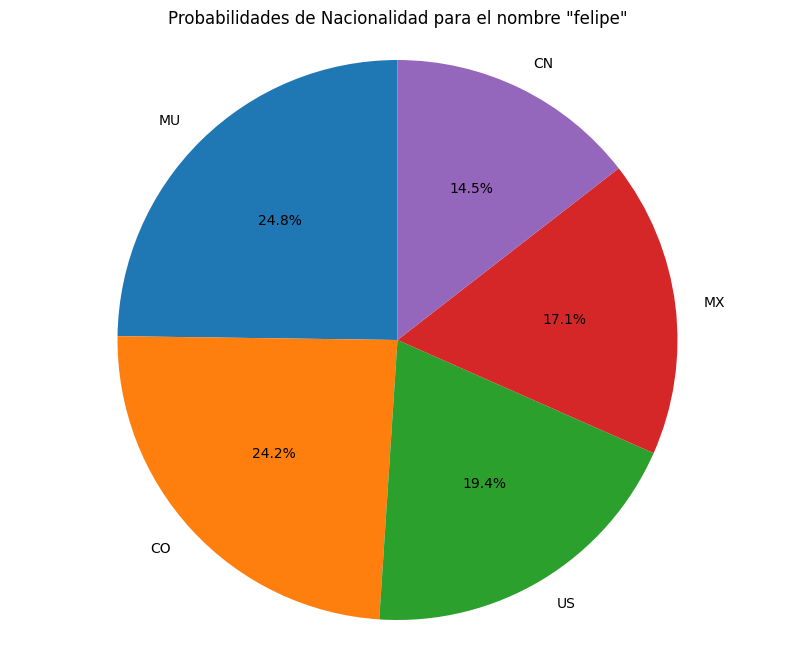

In [3]:
import matplotlib.pyplot as plt

# Hacer una petición a la API
nationality = peticionJSON('https://api.nationalize.io/?name=angel')
for key, value in nationality.items():
    print(f"{key}: {value}")

# Extraer datos para el gráfico
paises = [pais['country_id'] for pais in nationality['country']]
probabilidades = [pais['probability'] for pais in nationality['country']]

# Crear el gráfico
plt.figure(figsize=(10, 8))
plt.pie(probabilidades,
        labels=paises,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Probabilidades de Nacionalidad para el nombre "felipe"')
plt.axis('equal')
plt.show()